details are 
     BMI  Age  Sugar
0  33.6   50      1
1  26.6   30      0
2  23.4   40      0
3  43.1   67      0
4  35.3   23      1
5  35.9   67      1
6  36.7   45      1
7  25.7   46      0
8  23.3   29      0
9  31.0   56      1


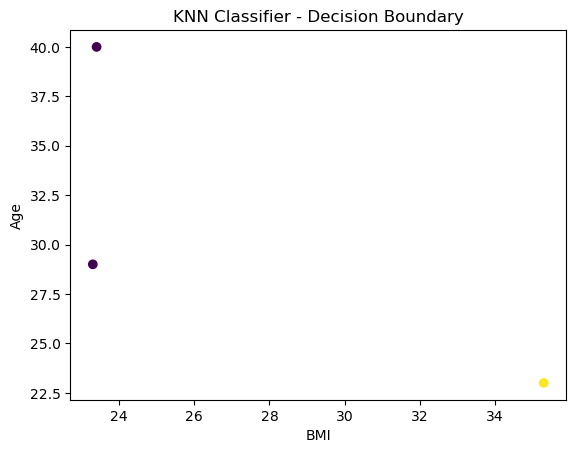

[0 0 1]
[1]
[1]
f1score 1.0
cm [[2 0]
 [0 1]]
acc 1.0


C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

dict={'BMI':[33.6,26.6,23.4,43.1,35.3,35.9,36.7,25.7,23.3,31],
     'Age':[50,30,40,67,23,67,45,46,29,56],
     'Sugar':[1,0,0,0,1,1,1,0,0,1]}
df=pd.DataFrame(dict)
print("details are \n",df)

x=df[['BMI','Age']]
y=df.Sugar


#print(x)
#print(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)
plt.scatter(x_test['BMI'], x_test['Age'], c=y_pred)
plt.title('KNN Classifier - Decision Boundary')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

classifier=KNeighborsClassifier(n_neighbors=3,p=2,metric='euclidean')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(y_pred)

new_data=pd.DataFrame({'BMI':[43.6],'Age':[40]})
sc_ndata=sc.transform(new_data)
y_npred=classifier.predict(sc_ndata)
print(y_npred)

new_data1=pd.DataFrame({'BMI':[40],'Age':[55]})
sc_ndata1=sc.transform(new_data1)
y_npred1=classifier.predict(sc_ndata1)
print(y_npred1)

print("f1score",f1_score(y_test,y_pred))
print("cm",confusion_matrix(y_test,y_pred))
print("acc",accuracy_score(y_test,y_pred))